# Fake News in Indonesia

Fake news, or hoax news, has become a significant challenge in Indonesia's digital landscape. With the widespread adoption of social media and messaging platforms, misinformation spreads rapidly across the country.

## Key Characteristics

- **Political Context**: Fake news often emerges during election periods and political events, aiming to influence public opinion or discredit opponents
- **Social Media Spread**: Platforms like WhatsApp, Facebook, and Twitter serve as primary channels for disseminating false information
- **Language Nuances**: Indonesian fake news contains unique linguistic patterns and cultural references specific to the local context

## Challenges in Detection

- **Language Complexity**: Bahasa Indonesia mixed with regional languages and slang makes automated detection difficult
- **Limited Resources**: Fewer labeled datasets and detection tools compared to English-language fake news
- **Rapid Evolution**: Hoax creators continuously adapt their strategies to evade detection

## Fact-Checking Initiatives

Organizations like **TurnBackHoax.id** and other verification platforms work to combat misinformation by:
- Verifying viral claims
- Providing factual corrections
- Educating the public about media literacy

## Impact

The spread of fake news in Indonesia can lead to:
- Social polarization
- Public confusion during crises
- Erosion of trust in legitimate media
- Real-world consequences including violence or panic

In [1]:
import os

# List all files in the current folder
files = os.listdir('.')
for file in files:
    print(file)

order7239414.txt
Indonesian Fact and Hoax Political News.zip
Indonesian Fact and Hoax Political News
Indonesia False News Dataset 2025-turnbackhoax.id.zip
Deteksi Berita Hoaks Indo - Dataset.zip
Indonesian Hoax News Dataset.zip
Indonesia False News Dataset 2025-turnbackhoax.id
Deteksi Berita Hoaks Indo - Dataset
Indonesian Hoax News Dataset
training.ipynb


### Dataset Combination

Before preprocessing, we combine multiple datasets from various sources:

- **Deteksi Berita Hoaks Indo Dataset**: CNN, Detik, Kompas, TurnBackHoax cleaned versions
- **Indonesia False News Dataset 2025**: TurnBackHoax 2025 data
- **Indonesian Fact and Hoax Political News**: CNN 10K, Kompas 4K, Tempo 6K, TurnBackHoax 10K cleaned versions
- **Indonesian Hoax News Dataset**: Komdigi hoax news data

The unified dataset contains **68,139 entries** with standardized columns (text, title, label, source, url) for consistent processing across all sources.

### Why Preprocessing Matters

Effective preprocessing improves model accuracy by reducing noise and standardizing the input data, making it easier for machine learning algorithms to identify patterns that distinguish fake news from legitimate news.

Most of the datasets are in .xlsx, converting to csv

Find the .xlsx file

In [4]:
import os

# Check for xlsx files in current directory
xlsx_files = [f for f in files if f.endswith('.xlsx')]
print(f"Found {len(xlsx_files)} .xlsx files in current directory")

# Check in subdirectories
for root, dirs, dir_files in os.walk('.'):
    for file in dir_files:
        if file.endswith('.xlsx'):
            full_path = os.path.join(root, file)
            print(f"Found: {full_path}")


Found 0 .xlsx files in current directory
Found: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_cnn_10k_cleaned.xlsx
Found: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_kompas_4k_cleaned.xlsx
Found: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_tempo_6k_cleaned.xlsx
Found: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_turnbackhoax_10_cleaned.xlsx
Found: .\Indonesian Fact and Hoax Political News\RAW\dataset_cnn_10k.xlsx
Found: .\Indonesian Fact and Hoax Political News\RAW\dataset_kompas_4k.xlsx
Found: .\Indonesian Fact and Hoax Political News\RAW\dataset_tempo_6k.xlsx
Found: .\Indonesian Fact and Hoax Political News\RAW\dataset_turnbackhoax_10k.xlsx
Found: .\Indonesian Fact and Hoax Political News\Summarized\dataset_cnn_summarized.xlsx
Found: .\Indonesian Fact and Hoax Political News\Summarized\dataset_kompas_summarized.xlsx
Found: .\Indonesian Fact and Hoax Political News\Summarized\dataset_tempo_summarized.xlsx
Found: .\Indonesian Fact an

Convert xlsx files to csv using pandas

In [5]:
import pandas as pd
import os

# Find all xlsx files
xlsx_files_found = []
for root, dirs, dir_files in os.walk('.'):
    for file in dir_files:
        if file.endswith('.xlsx'):
            xlsx_files_found.append(os.path.join(root, file))

print(f"Found {len(xlsx_files_found)} .xlsx files")

# Convert each xlsx file to csv
for xlsx_path in xlsx_files_found:
    try:
        # Read the xlsx file
        df = pd.read_excel(xlsx_path)
        
        # Create csv filename (same path, different extension)
        csv_path = xlsx_path.replace('.xlsx', '.csv')
        
        # Save as csv
        df.to_csv(csv_path, index=False)
        
        print(f"Converted: {xlsx_path} -> {csv_path}")
        print(f"  Shape: {df.shape}")
        
    except Exception as e:
        print(f"Error converting {xlsx_path}: {str(e)}")

print("\nConversion complete!")

Found 16 .xlsx files
Converted: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_cnn_10k_cleaned.xlsx -> .\Indonesian Fact and Hoax Political News\Cleaned\dataset_cnn_10k_cleaned.csv
  Shape: (9630, 9)
Converted: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_kompas_4k_cleaned.xlsx -> .\Indonesian Fact and Hoax Political News\Cleaned\dataset_kompas_4k_cleaned.csv
  Shape: (4750, 9)
Converted: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_tempo_6k_cleaned.xlsx -> .\Indonesian Fact and Hoax Political News\Cleaned\dataset_tempo_6k_cleaned.csv
  Shape: (6592, 9)
Converted: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_turnbackhoax_10_cleaned.xlsx -> .\Indonesian Fact and Hoax Political News\Cleaned\dataset_turnbackhoax_10_cleaned.csv
  Shape: (10381, 11)
Converted: .\Indonesian Fact and Hoax Political News\RAW\dataset_cnn_10k.xlsx -> .\Indonesian Fact and Hoax Political News\RAW\dataset_cnn_10k.csv
  Shape: (10000, 6)
Converted: .\Indonesian Fact

Move the csv files to one singular folder

In [6]:
import os
import shutil

# Create the dataset folder if it doesn't exist
dataset_folder = 'dataset'
if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)
    print(f"Created folder: {dataset_folder}")
else:
    print(f"Folder already exists: {dataset_folder}")

# Find all csv files
csv_files_found = []
for root, dirs, dir_files in os.walk('.'):
    for file in dir_files:
        if file.endswith('.csv'):
            csv_path = os.path.join(root, file)
            # Skip files already in the dataset folder
            if not csv_path.startswith(f'.{os.sep}{dataset_folder}'):
                csv_files_found.append(csv_path)

print(f"\nFound {len(csv_files_found)} .csv files to move")

# Move each csv file to the dataset folder
for csv_file in csv_files_found:
    try:
        # Get just the filename
        filename = os.path.basename(csv_file)
        
        # Create destination path
        destination = os.path.join(dataset_folder, filename)
        
        # Handle duplicate filenames by adding folder name prefix
        if os.path.exists(destination):
            # Get the parent folder name and add it as prefix
            parent_folder = os.path.basename(os.path.dirname(csv_file))
            new_filename = f"{parent_folder}_{filename}"
            destination = os.path.join(dataset_folder, new_filename)
        
        # Move the file
        shutil.move(csv_file, destination)
        print(f"Moved: {csv_file} -> {destination}")
        
    except Exception as e:
        print(f"Error moving {csv_file}: {str(e)}")

print(f"\nAll CSV files moved to '{dataset_folder}' folder!")

Created folder: dataset

Found 26 .csv files to move
Moved: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_cnn_10k_cleaned.csv -> dataset\dataset_cnn_10k_cleaned.csv
Moved: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_kompas_4k_cleaned.csv -> dataset\dataset_kompas_4k_cleaned.csv
Moved: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_tempo_6k_cleaned.csv -> dataset\dataset_tempo_6k_cleaned.csv
Moved: .\Indonesian Fact and Hoax Political News\Cleaned\dataset_turnbackhoax_10_cleaned.csv -> dataset\dataset_turnbackhoax_10_cleaned.csv
Moved: .\Indonesian Fact and Hoax Political News\RAW\dataset_cnn_10k.csv -> dataset\dataset_cnn_10k.csv
Moved: .\Indonesian Fact and Hoax Political News\RAW\dataset_kompas_4k.csv -> dataset\dataset_kompas_4k.csv
Moved: .\Indonesian Fact and Hoax Political News\RAW\dataset_tempo_6k.csv -> dataset\dataset_tempo_6k.csv
Moved: .\Indonesian Fact and Hoax Political News\RAW\dataset_turnbackhoax_10k.csv -> dataset\dataset_turnbackho

Theres alot of datasets and some of them has the raw, cleaned, and summarized versions.

In [ ]:
# # Load all CSV files from the dataset folder
# csv_files_in_dataset = [f for f in os.listdir(dataset_folder) if f.endswith('.csv')]
# csv_files_in_dataset = [os.path.join(dataset_folder, f) for f in csv_files_in_dataset]
# print(f"Found {len(csv_files_in_dataset)} CSV files in dataset folder")

# # Initialize an empty list to store dataframes
# df_list = []

# # Read each CSV file and store in list
# for csv_file_path in csv_files_in_dataset:
#     try:
#         df_temp = pd.read_csv(csv_file_path)
#         df_list.append(df_temp)
#         filename = os.path.basename(csv_file_path)
#         print(f"Loaded: {filename} - Shape: {df_temp.shape}")
#     except Exception as e:
#         filename = os.path.basename(csv_file_path)
#         print(f"Error loading {filename}: {str(e)}")

# # Combine all dataframes
# if df_list:
#     # Concatenate all dataframes, filling missing columns with NaN
#     combined_df = pd.concat(df_list, ignore_index=True, sort=False)
    
#     print(f"\nCombined dataset shape: {combined_df.shape}")
#     print("\nColumn names:")
#     print(combined_df.columns.tolist())
#     print("\nFirst few rows:")
#     print(combined_df.head())
# else:
#     print("No dataframes to combine")
# print(combined_df.head())

Found 26 CSV files in dataset folder
Error loading idn-turnbackhoax-2025.csv: Error tokenizing data. C error: Expected 12 fields in line 5, saw 20

Loaded: cnnindonesia_news_RAW.csv - Shape: (4216, 4)
Loaded: detikcom_news_RAW.csv - Shape: (4216, 4)
Loaded: kompas_news_RAW.csv - Shape: (4216, 4)
Loaded: turnbackhoax_2020_2025.csv - Shape: (12648, 4)
Loaded: Summarized_CNN.csv - Shape: (4216, 8)
Loaded: Summarized_Detik.csv - Shape: (4214, 8)
Loaded: Summarized_Kompas.csv - Shape: (4216, 8)
Loaded: Summarized_TurnBackHoax.csv - Shape: (12029, 8)
Loaded: komdigi_hoaks.csv - Shape: (15361, 13)
Loaded: dataset_cnn_10k_cleaned.csv - Shape: (9630, 9)
Loaded: dataset_kompas_4k_cleaned.csv - Shape: (4750, 9)
Loaded: dataset_tempo_6k_cleaned.csv - Shape: (6592, 9)
Loaded: dataset_turnbackhoax_10_cleaned.csv - Shape: (10381, 11)
Loaded: dataset_cnn_10k.csv - Shape: (10000, 6)
Loaded: dataset_kompas_4k.csv - Shape: (4750, 6)
Loaded: dataset_tempo_6k.csv - Shape: (6592, 6)
Loaded: dataset_turnback

## Available Datasets

Using the following datasets:

### 1. Deteksi Berita Hoaks Indo - Dataset
Source: https://www.kaggle.com/datasets/mochamadabdulazis/deteksi-berita-hoaks-indo-dataset
- `dataset_cnn_cleaned.csv`
- `dataset_detik_cleaned.csv`
- `dataset_kompas_cleaned.csv`
- `dataset_turnbackhoax_cleaned.csv`

### 2. Indonesia False News Dataset 2025-turnbackhoax.id
Source: https://www.kaggle.com/datasets/wahyusuryaningrat/indonesia-false-news-dataset-2025-turnbackhoax-id
- `idn-turnbackhoax-2025.csv`

### 3. Indonesian Fact and Hoax Political News
Source: https://www.kaggle.com/datasets/linkgish/indonesian-fact-and-hoax-political-news
- `dataset_cnn_10k_cleaned.csv`
- `dataset_kompas_4k_cleaned.csv`
- `dataset_tempo_6k_cleaned.csv`
- `dataset_turnbackhoax_10_cleaned.csv`

### 4. Indonesian Hoax News Dataset
Source: https://www.kaggle.com/datasets/ireddragonicy/indonesian-hoax-news-dataset
- `komdigi_hoaks.csv`

---

**Note**: Multiple versions of datasets exist (RAW, Cleaned, Summarized). For this analysis, we'll primarily use the **cleaned versions** to ensure data quality and consistency in preprocessing.

Load all the needed datasets

In [18]:
# Load ALL cleaned datasets including the larger versions
datasets_to_load = {
    # Deteksi Berita Hoaks Indo - Dataset (smaller cleaned versions)
    'cnn_cleaned': 'dataset/dataset_cnn_cleaned.csv',
    'detik_cleaned': 'dataset/dataset_detik_cleaned.csv',
    'kompas_cleaned': 'dataset/dataset_kompas_cleaned.csv',
    'turnbackhoax_cleaned': 'dataset/dataset_turnbackhoax_cleaned.csv',
    
    # Indonesia False News Dataset 2025-turnbackhoax.id
    'idn_turnbackhoax_2025': 'dataset/idn-turnbackhoax-2025.csv',
    
    # Indonesian Fact and Hoax Political News (larger cleaned versions)
    'cnn_10k_cleaned': 'dataset/dataset_cnn_10k_cleaned.csv',
    'kompas_4k_cleaned': 'dataset/dataset_kompas_4k_cleaned.csv',
    'tempo_6k_cleaned': 'dataset/dataset_tempo_6k_cleaned.csv',
    'turnbackhoax_10k_cleaned': 'dataset/dataset_turnbackhoax_10_cleaned.csv',
    
    # Indonesian Hoax News Dataset
    'komdigi_hoaks': 'dataset/komdigi_hoaks.csv'
}

print(f"Loading {len(datasets_to_load)} datasets...\n")

# Load each dataset and examine structure
for name, path in datasets_to_load.items():
    try:
        temp_df = pd.read_csv(path)
        print(f"{'='*60}")
        print(f"Dataset: {name}")
        print(f"{'='*60}")
        print(f"Shape: {temp_df.shape}")
        print(f"Columns: {temp_df.columns.tolist()}")
        print(f"\nMissing values:")
        print(temp_df.isnull().sum()[temp_df.isnull().sum() > 0])
        print()
    except Exception as e:
        print(f"\nError loading {name}: {str(e)}\n")

# Store loaded datasets in a dictionary for later use
loaded_datasets = {}

for name, path in datasets_to_load.items():
    try:
        loaded_datasets[name] = pd.read_csv(path)
    except Exception as e:
        print(f"Could not store {name}: {str(e)}")

print(f"\n{'='*60}")
print("Summary of all datasets loaded")
print(f"{'='*60}")
print(f"Total datasets successfully loaded: {len(loaded_datasets)}")
print(f"\nDataset sizes:")
for name, df in loaded_datasets.items():
    print(f"  {name:30s}: {df.shape[0]:,} rows x {df.shape[1]} columns")

print(f"\nTotal combined rows: {sum(df.shape[0] for df in loaded_datasets.values()):,}")

Loading 10 datasets...

Dataset: cnn_cleaned
Shape: (4216, 7)
Columns: ['url', 'judul', 'tanggal', 'isi_berita', 'Narasi', 'Clean Narasi', 'hoax']

Missing values:
Series([], dtype: int64)

Dataset: detik_cleaned
Shape: (4216, 7)
Columns: ['url', 'judul', 'tanggal', 'isi_berita', 'Narasi', 'Clean Narasi', 'hoax']

Missing values:
Narasi          2
Clean Narasi    2
dtype: int64

Dataset: kompas_cleaned
Shape: (4216, 7)
Columns: ['url', 'judul', 'tanggal', 'isi_berita', 'Narasi', 'Clean Narasi', 'hoax']

Missing values:
Series([], dtype: int64)

Dataset: turnbackhoax_cleaned
Shape: (12648, 7)
Columns: ['url', 'judul', 'tanggal', 'isi_berita', 'Narasi', 'Clean Narasi', 'hoax']

Missing values:
isi_berita        4
Narasi          623
Clean Narasi    619
dtype: int64


Error loading idn_turnbackhoax_2025: Error tokenizing data. C error: Expected 12 fields in line 5, saw 20


Dataset: cnn_10k_cleaned
Shape: (9630, 9)
Columns: ['Unnamed: 0', 'Title', 'Timestamp', 'FullText', 'Tags', 'Author'

Combine the dataset

In [19]:
# Create a standardized unified dataset from all loaded datasets
unified_data = []

# Process each dataset and extract relevant columns
for name, df in loaded_datasets.items():
    print(f"Processing: {name}")
    
    # Create a temporary dataframe with standardized columns
    temp_data = pd.DataFrame()
    
    # Extract text content (prioritize different text columns based on dataset)
    if 'Clean Narasi' in df.columns:
        temp_data['text'] = df['Clean Narasi'].fillna(df.get('Narasi', '')).fillna(df.get('isi_berita', ''))
    elif 'text_new' in df.columns:
        temp_data['text'] = df['text_new'].fillna(df.get('FullText', ''))
    elif 'body_text' in df.columns:
        temp_data['text'] = df['body_text'].fillna('')
    else:
        temp_data['text'] = df.get('isi_berita', df.get('FullText', ''))
    
    # Extract title
    if 'judul' in df.columns:
        temp_data['title'] = df['judul']
    elif 'Title' in df.columns:
        temp_data['title'] = df['Title']
    elif 'title' in df.columns:
        temp_data['title'] = df['title']
    else:
        temp_data['title'] = ''
    
    # Extract label (hoax=1 for hoax, hoax=0 for legitimate news)
    if 'hoax' in df.columns:
        temp_data['label'] = df['hoax']
    else:
        # komdigi_hoaks dataset - all entries are hoax
        temp_data['label'] = 1
    
    # Extract source
    temp_data['source'] = name
    
    # Extract URL
    if 'url' in df.columns:
        temp_data['url'] = df['url']
    elif 'Url' in df.columns:
        temp_data['url'] = df['Url']
    else:
        temp_data['url'] = ''
    
    # Add to unified list
    unified_data.append(temp_data)
    print(f"  Added {len(temp_data)} rows")

# Combine all datasets
unified_df = pd.concat(unified_data, ignore_index=True)

print(f"\n{'='*60}")
print("Unified Dataset Summary")
print(f"{'='*60}")
print(f"Total rows: {len(unified_df):,}")
print(f"Columns: {unified_df.columns.tolist()}")
print(f"\nLabel distribution:")
print(unified_df['label'].value_counts())
print(f"\nMissing values:")
print(unified_df.isnull().sum())
print(f"\nSample rows:")
print(unified_df.head())

# Remove rows with empty text
unified_df = unified_df[unified_df['text'].str.strip() != '']
print(f"\nAfter removing empty text rows: {len(unified_df):,} rows")

# Check text length distribution
unified_df['text_length'] = unified_df['text'].str.len()
print(f"\nText length statistics:")
print(unified_df['text_length'].describe())

Processing: cnn_cleaned
  Added 4216 rows
Processing: detik_cleaned
  Added 4216 rows
Processing: kompas_cleaned
  Added 4216 rows
Processing: turnbackhoax_cleaned
  Added 12648 rows
Processing: cnn_10k_cleaned
  Added 9630 rows
Processing: kompas_4k_cleaned
  Added 4750 rows
Processing: tempo_6k_cleaned
  Added 6592 rows
Processing: turnbackhoax_10k_cleaned
  Added 10381 rows
Processing: komdigi_hoaks
  Added 15361 rows

Unified Dataset Summary
Total rows: 72,010
Columns: ['text', 'title', 'label', 'source', 'url']

Label distribution:
label
1    38390
0    33620
Name: count, dtype: int64

Missing values:
text      28
title     21
label      0
source     0
url        0
dtype: int64

Sample rows:
                                                text  \
0  Uskup Agung Jakarta Kardinal Mgr. Ignatius Suh...   
1  Mike Tysonmenyebut legenda tinju dunia,Muhamma...   
2  Pesta diskon bertajukTransmart Full Day Saleke...   
3  Kejaksaan Agung (Kejagung) menyebut jumlah uan...   
4  Mohamed Sal

Make the combined dataset

In [21]:
# Display information about the unified dataset
print(f"{'='*60}")
print("UNIFIED DATASET OVERVIEW")
print(f"{'='*60}\n")

print(f"Total rows: {len(unified_df):,}")
print(f"Total columns: {len(unified_df.columns)}")
print(f"\nColumns: {unified_df.columns.tolist()}\n")

print(f"{'='*60}")
print("LABEL DISTRIBUTION")
print(f"{'='*60}")
print(unified_df['label'].value_counts())
print(f"\nLabel percentages:")
print(unified_df['label'].value_counts(normalize=True) * 100)

print(f"\n{'='*60}")
print("SOURCE DISTRIBUTION")
print(f"{'='*60}")
print(unified_df['source'].value_counts())

print(f"\n{'='*60}")
print("MISSING VALUES")
print(f"{'='*60}")
print(unified_df.isnull().sum())

print(f"\n{'='*60}")
print("TEXT LENGTH STATISTICS")
print(f"{'='*60}")
print(unified_df['text_length'].describe())

print(f"\n{'='*60}")
print("SAMPLE DATA")
print(f"{'='*60}")
print(unified_df.head(10))

print(f"\n{'='*60}")
print("SAMPLE HOAX NEWS (label=1)")
print(f"{'='*60}")
print(unified_df[unified_df['label'] == 1][['title', 'source']].head())

print(f"\n{'='*60}")
print("SAMPLE LEGITIMATE NEWS (label=0)")
print(f"{'='*60}")
print(unified_df[unified_df['label'] == 0][['title', 'source']].head())

# Save the unified dataset to CSV
output_filename = 'combined_dataset.csv'
unified_df.to_csv(output_filename, index=False, encoding='utf-8')
print(f"\n{'='*60}")
print(f"Dataset saved to: {output_filename}")
print(f"{'='*60}")

UNIFIED DATASET OVERVIEW

Total rows: 68,139
Total columns: 6

Columns: ['text', 'title', 'label', 'source', 'url', 'text_length']

LABEL DISTRIBUTION
label
1    34519
0    33620
Name: count, dtype: int64

Label percentages:
label
1    50.659681
0    49.340319
Name: proportion, dtype: float64

SOURCE DISTRIBUTION
source
komdigi_hoaks               15359
turnbackhoax_cleaned        12648
cnn_10k_cleaned              9630
tempo_6k_cleaned             6592
turnbackhoax_10k_cleaned     6512
kompas_4k_cleaned            4750
cnn_cleaned                  4216
detik_cleaned                4216
kompas_cleaned               4216
Name: count, dtype: int64

MISSING VALUES
text           28
title          21
label           0
source          0
url             0
text_length    28
dtype: int64

TEXT LENGTH STATISTICS
count    68111.000000
mean      1223.762373
std       1118.355013
min          1.000000
25%        450.000000
50%       1006.000000
75%       1708.000000
max      32491.000000
Name: tex

In [22]:
# Display the first few rows of the combined dataset
print(combined_df.head())

                                                 url  \
0  https://www.cnnindonesia.com/nasional/20250420...   
1  https://www.cnnindonesia.com/olahraga/20250420...   
2  https://www.cnnindonesia.com/ekonomi/202504171...   
3  https://www.cnnindonesia.com/nasional/20250420...   
4  https://www.cnnindonesia.com/olahraga/20250420...   

                                               judul  \
0  Pesan Paskah Uskup Agung Jakarta Kardinal Igna...   
1  Mike Tyson: Muhammad Ali Ganas seperti T-Rex, ...   
2  Kulkas SBS Banting Harga Gila-gilaan di Transm...   
3  Hakim Djuyamto Diduga Titip Rp704 Juta ke Satp...   
4  Leicester vs Liverpool: Menanti Gol Kaki Kiri ...   

                         tanggal  \
0  Minggu, 20 Apr 2025 15:07 WIB   
1  Minggu, 20 Apr 2025 15:01 WIB   
2  Minggu, 20 Apr 2025 15:00 WIB   
3  Minggu, 20 Apr 2025 14:44 WIB   
4  Minggu, 20 Apr 2025 14:33 WIB   

                                          isi_berita Narasi Clean Narasi  \
0  Uskup Agung Jakarta Kardinal M

## Next Step: Exploratory Data Analysis (EDA)

After combining the datasets, the next step is to perform Exploratory Data Analysis (EDA). EDA helps you understand the structure, distribution, and key characteristics of your data before building models.

### Key EDA Activities

- **Visualize Label Distribution:** Check the balance between hoax and legitimate news.
- **Analyze Text Length:** Explore the distribution of article lengths.
- **Source Analysis:** See which sources contribute most to the dataset.
- **Missing Values:** Identify and handle missing or incomplete data.
- **Sample Inspection:** Review random samples of hoax and legitimate news for quality.

### Example EDA Questions

- Are there more hoax or legitimate news articles?
- Which sources have the most hoax news?
- What is the typical length of news articles?
- Are there columns with many missing values?

---

**Next:**  
Proceed to visualize and summarize the combined dataset using plots and descriptive statistics. This will guide further preprocessing and model selection.

LABEL DISTRIBUTION ANALYSIS


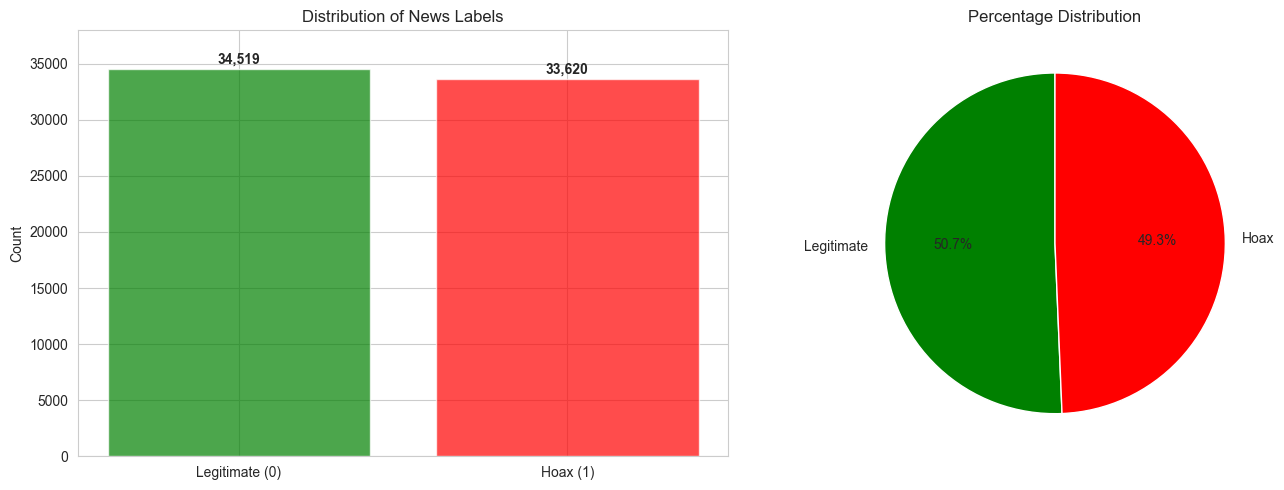


Legitimate News: 33,620 (49.34%)
Hoax News: 34,519 (50.66%)

TEXT LENGTH ANALYSIS


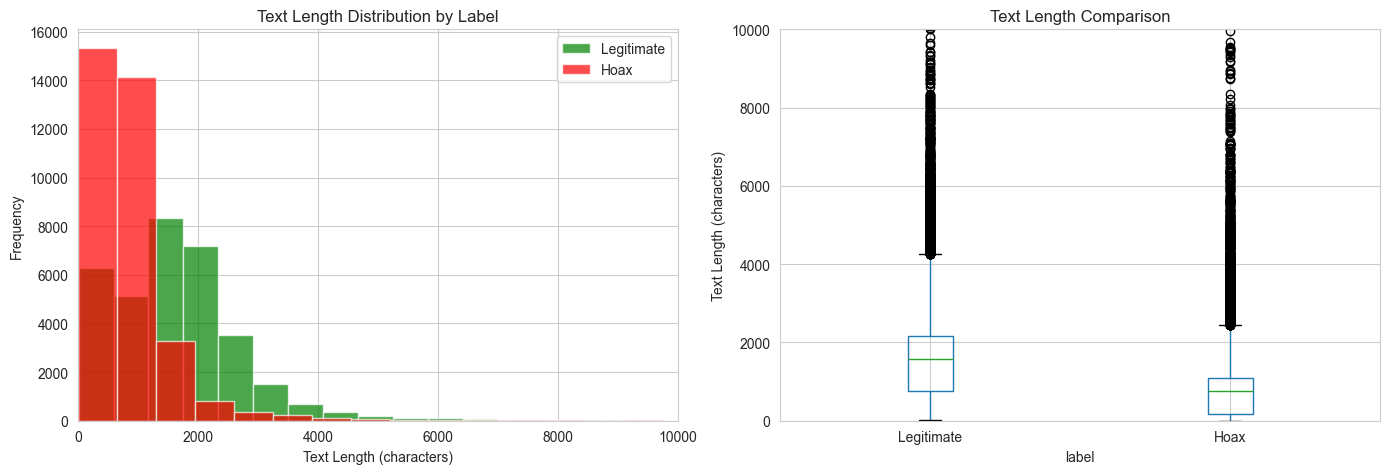


Text Length Statistics by Label:
         count         mean          std  min    25%     50%     75%      max
label                                                                        
0      33593.0  1650.209746  1146.352405  9.0  763.0  1574.0  2160.0  29140.0
1      34518.0   808.742772   916.412592  1.0  184.0   747.0  1089.0  32491.0

SOURCE DISTRIBUTION ANALYSIS
source
komdigi_hoaks               15359
turnbackhoax_cleaned        12648
cnn_10k_cleaned              9630
tempo_6k_cleaned             6592
turnbackhoax_10k_cleaned     6512
kompas_4k_cleaned            4750
cnn_cleaned                  4216
detik_cleaned                4216
kompas_cleaned               4216
Name: count, dtype: int64


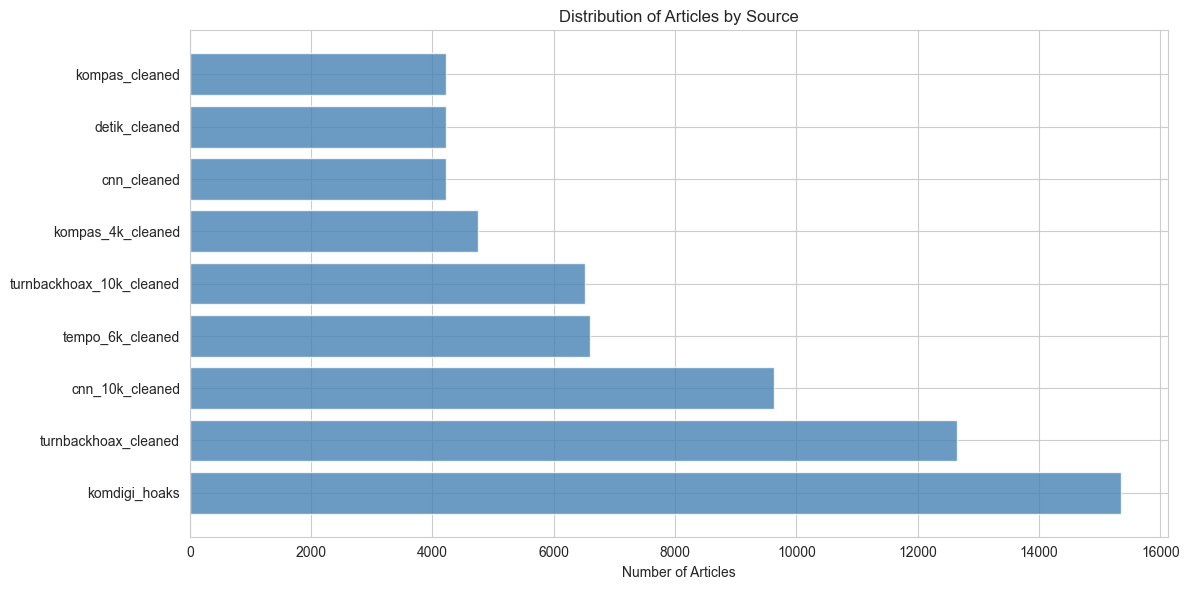


LABEL DISTRIBUTION BY SOURCE
label                        0      1
source                               
cnn_10k_cleaned           9630      0
cnn_cleaned               4216      0
detik_cleaned             4216      0
komdigi_hoaks                0  15359
kompas_4k_cleaned         4750      0
kompas_cleaned            4216      0
tempo_6k_cleaned          6592      0
turnbackhoax_10k_cleaned     0   6512
turnbackhoax_cleaned         0  12648


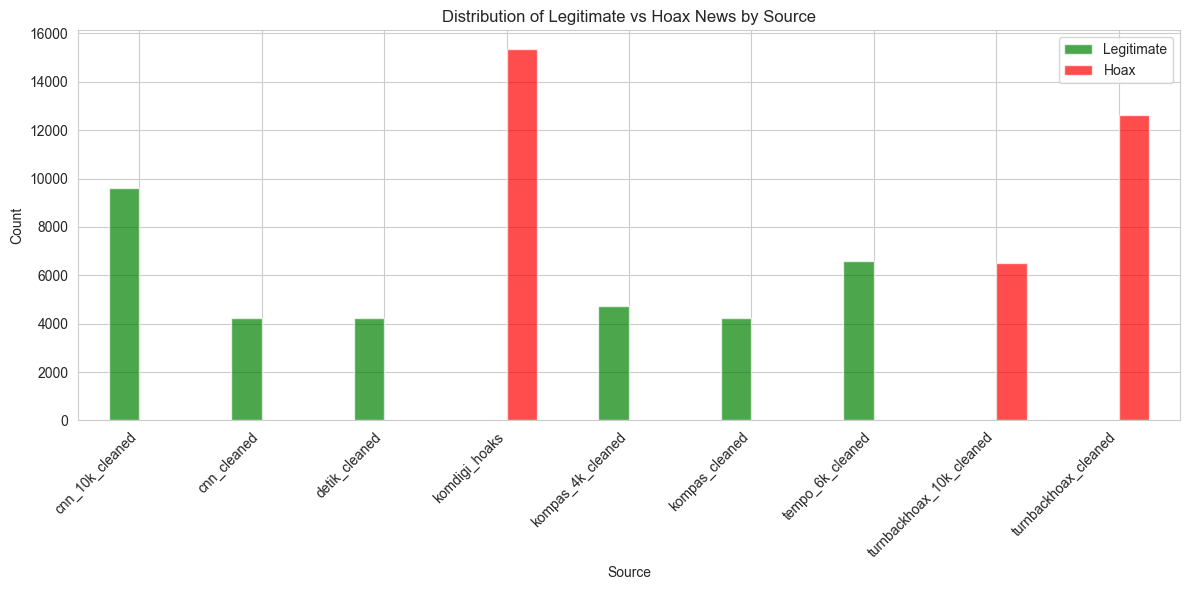


MISSING VALUES ANALYSIS
             Missing Count  Percentage
text                    28    0.041092
title                   21    0.030819
text_length             28    0.041092

SAMPLE HOAX NEWS

Title: [SALAH] Video “Surabaya macet total AKSI MELAWAN POLITIK DINASTI”...
Source: turnbackhoax_cleaned
Text Length: 99.0
Text Preview: Surabaya macet total AKSI MELAWAN POLITIK DINASTIRATUSAN RIBU MAHASISWA SE-JAWA TIMUR TURUN KEJALAN...
------------------------------------------------------------

Title: [SALAH] “Anak Cina di Uang Pecahan Rp75.000 Niat Cinanisasi NKRI”...
Source: turnbackhoax_cleaned
Text Length: 601.0
Text Preview: Akun Facebook Randi Randi menunggah gambar (17/08/2020) yang memperlihatkan gambar anak kecil yang ada pada uang pecahan Rp75.000 juga terdapat narasi dalam gambar sebagai berikut: Naaah udah Ketemu j...
------------------------------------------------------------

Title: [HOAKS] Pelaku Perdagangan Organ Tubuh di Balikpapan...
Source: komdigi_hoaks
Text Leng

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. LABEL DISTRIBUTION
print("="*60)
print("LABEL DISTRIBUTION ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
label_counts = unified_df['label'].value_counts()
axes[0].bar(['Legitimate (0)', 'Hoax (1)'], label_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of News Labels')
axes[0].set_ylim(0, max(label_counts.values) * 1.1)
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart (removed alpha parameter)
axes[1].pie(label_counts.values, labels=['Legitimate', 'Hoax'], 
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Percentage Distribution')

plt.tight_layout()
plt.show()

print(f"\nLegitimate News: {label_counts[0]:,} ({label_counts[0]/len(unified_df)*100:.2f}%)")
print(f"Hoax News: {label_counts[1]:,} ({label_counts[1]/len(unified_df)*100:.2f}%)")

# 2. TEXT LENGTH ANALYSIS
print("\n" + "="*60)
print("TEXT LENGTH ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution by label
unified_df[unified_df['label']==0]['text_length'].hist(bins=50, alpha=0.7, 
                                                         color='green', label='Legitimate', ax=axes[0])
unified_df[unified_df['label']==1]['text_length'].hist(bins=50, alpha=0.7, 
                                                         color='red', label='Hoax', ax=axes[0])
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Text Length Distribution by Label')
axes[0].legend()
axes[0].set_xlim(0, 10000)

# Box plot
unified_df.boxplot(column='text_length', by='label', ax=axes[1])
axes[1].set_xticklabels(['Legitimate', 'Hoax'])
axes[1].set_ylabel('Text Length (characters)')
axes[1].set_title('Text Length Comparison')
axes[1].set_ylim(0, 10000)
plt.suptitle('')

plt.tight_layout()
plt.show()

print("\nText Length Statistics by Label:")
print(unified_df.groupby('label')['text_length'].describe())

# 3. SOURCE DISTRIBUTION
print("\n" + "="*60)
print("SOURCE DISTRIBUTION ANALYSIS")
print("="*60)

source_counts = unified_df['source'].value_counts()
print(source_counts)

plt.figure(figsize=(12, 6))
plt.barh(source_counts.index, source_counts.values, color='steelblue', alpha=0.8)
plt.xlabel('Number of Articles')
plt.title('Distribution of Articles by Source')
plt.tight_layout()
plt.show()

# 4. LABEL DISTRIBUTION BY SOURCE
print("\n" + "="*60)
print("LABEL DISTRIBUTION BY SOURCE")
print("="*60)

source_label_dist = unified_df.groupby(['source', 'label']).size().unstack(fill_value=0)
print(source_label_dist)

source_label_dist.plot(kind='bar', stacked=False, figsize=(12, 6), 
                        color=['green', 'red'], alpha=0.7)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distribution of Legitimate vs Hoax News by Source')
plt.legend(['Legitimate', 'Hoax'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. MISSING VALUES ANALYSIS
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_data = unified_df.isnull().sum()
missing_percent = (missing_data / len(unified_df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 
                            'Percentage': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

# 6. SAMPLE INSPECTION
print("\n" + "="*60)
print("SAMPLE HOAX NEWS")
print("="*60)
hoax_samples = unified_df[unified_df['label'] == 1].sample(n=3, random_state=42)
for idx, row in hoax_samples.iterrows():
    print(f"\nTitle: {row['title'][:100]}...")
    print(f"Source: {row['source']}")
    print(f"Text Length: {row['text_length']}")
    print(f"Text Preview: {row['text'][:200]}...")
    print("-" * 60)

print("\n" + "="*60)
print("SAMPLE LEGITIMATE NEWS")
print("="*60)
legit_samples = unified_df[unified_df['label'] == 0].sample(n=3, random_state=42)
for idx, row in legit_samples.iterrows():
    print(f"\nTitle: {row['title'][:100]}...")
    print(f"Source: {row['source']}")
    print(f"Text Length: {row['text_length']}")
    print(f"Text Preview: {row['text'][:200]}...")
    print("-" * 60)

print("\n" + "="*60)
print("EDA COMPLETE!")
print("="*60)


## Text Preprocessing for Indonesian Fake News Detection

After completing the Exploratory Data Analysis, the next crucial step is **text preprocessing**. This step transforms the raw text data into a clean, standardized format suitable for machine learning models.

### Preprocessing Pipeline

1. **Text Cleaning**
    - Remove URLs, special characters, and HTML entities
    - Handle punctuation and numbers
    - Normalize whitespace

2. **Case Normalization**
    - Convert all text to lowercase for consistency

3. **Tokenization**
    - Split text into individual words/tokens

4. **Stopword Removal**
    - Remove common Indonesian words that don't carry significant meaning
    - Use Indonesian-specific stopword lists (already loaded: `indonesian_stopwords`)

5. **Stemming**
    - Reduce words to their root forms using Sastrawi stemmer (already initialized: `stemmer`)
    - Example: "membaca" → "baca"

6. **Handle Class Imbalance**
    - Current distribution: 50.67% hoax vs 49.33% legitimate
    - Relatively balanced, but consider techniques like SMOTE if needed

### Benefits of Preprocessing

- **Reduces noise**: Removes irrelevant information
- **Improves performance**: Standardized text helps models learn patterns more effectively
- **Reduces dimensionality**: Fewer unique tokens to process
- **Language-specific**: Tailored for Indonesian text characteristics

---

**Next Steps:**
- Apply preprocessing functions to the `text` column in `unified_df`
- Create a new column with cleaned text
- Verify the preprocessing results with sample outputs
- Prepare data for feature extraction (TF-IDF, Word2Vec, or BERT embeddings)

In [ ]:
# import re
# from tqdm import tqdm

# # Simple cache for stemmed words
# stem_cache = {}

# def preprocess_text(text):
#     # Remove URLs
#     text = re.sub(r'http\S+|www\S+|https\S+', '', str(text), flags=re.MULTILINE)
#     # Remove HTML tags/entities
#     text = re.sub(r'<.*?>', '', text)
#     text = re.sub(r'&\w+;', '', text)
#     # Remove non-alphanumeric characters (except spaces)
#     text = re.sub(r'[^\w\s]', ' ', text)
#     # Remove numbers
#     text = re.sub(r'\d+', '', text)
#     # Normalize whitespace
#     text = re.sub(r'\s+', ' ', text).strip()
#     # Lowercase
#     text = text.lower()
#     # Tokenize
#     tokens = text.split()
#     # Remove stopwords
#     tokens = [t for t in tokens if t not in indonesian_stopwords]
#     # Stemming with cache
#     stemmed = []
#     for t in tokens:
#         if t in stem_cache:
#             stemmed.append(stem_cache[t])
#         else:
#             s = stemmer.stem(t)
#             stem_cache[t] = s
#             stemmed.append(s)
#     return ' '.join(stemmed)

# # Use tqdm for progress bar
# tqdm.pandas()
# unified_df['clean_text'] = unified_df['text'].progress_apply(preprocess_text)

# # Show sample before/after
# print("Sample original text:")
# print(unified_df['text'].iloc[0])
# print("\nSample cleaned text:")
# print(unified_df['clean_text'].iloc[0])

  0%|          | 289/68139 [02:16<8:54:26,  2.12it/s] 


KeyboardInterrupt: 

In [5]:
# ...existing code...
import os
import pandas as pd
# ...existing code...

# Check for duplicates in the combined dataset

# Prefer using in-memory unified_df; fall back to CSV if needed
try:
    df_to_check = unified_df.copy()
    data_source = "unified_df (in-memory)"
except NameError:
    data_source = None
    candidate_paths = [
        'combined_dataset.csv',          # saved in cell 18
        'combined_datasets.csv'          # user-typed variant
    ]
    for p in candidate_paths:
        if os.path.exists(p):
            df_to_check = pd.read_csv(p)
            data_source = p
            break

    if data_source is None:
        raise FileNotFoundError("Neither 'unified_df' nor 'combined_dataset(s).csv' found. Run previous cells to create the dataset.")

print(f"Using data from: {data_source}")
print(f"Total rows: {len(df_to_check):,}")
# ...existing code...

# Ensure essential columns exist
required_cols = ['text', 'title', 'url']
for c in required_cols:
    if c not in df_to_check.columns:
        df_to_check[c] = ''

# Normalize fields for duplicate checks
df_norm = df_to_check.copy()
df_norm['text_norm'] = df_norm['text'].astype(str).str.strip()
df_norm['title_norm'] = df_norm['title'].astype(str).str.strip()
df_norm['url_norm'] = df_norm['url'].astype(str).str.strip()

# 1) Duplicates by non-empty URL
df_url = df_norm[df_norm['url_norm'] != '']
dup_url_mask = df_url.duplicated(subset=['url_norm'], keep=False)
dup_url = df_url[dup_url_mask].sort_values('url_norm')

# 2) Duplicates by exact text
dup_text_mask = df_norm.duplicated(subset=['text_norm'], keep=False)
dup_text = df_norm[dup_text_mask].sort_values('text_norm')

# 3) Duplicates by (title + text)
dup_title_text_mask = df_norm.duplicated(subset=['title_norm', 'text_norm'], keep=False)
dup_title_text = df_norm[dup_title_text_mask].sort_values(['title_norm', 'text_norm'])

# Summary
print("\n" + "="*60)
print("DUPLICATE SUMMARY")
print("="*60)
print(f"Duplicate URL rows: {len(dup_url):,} across {dup_url['url_norm'].nunique():,} URL groups")
print(f"Duplicate TEXT rows: {len(dup_text):,} across {dup_text['text_norm'].nunique():,} text groups")
print(f"Duplicate (TITLE+TEXT) rows: {len(dup_title_text):,} across {dup_title_text[['title_norm','text_norm']].drop_duplicates().shape[0]:,} groups")

# Show small samples
def show_groups(df_grouped, key, n_groups=3, n_rows=3):
    shown = 0
    for k, g in df_grouped:
        print(f"\n-- Group key: {key} = {k!r} | rows: {len(g)}")
        display_cols = ['title', 'source', 'url'] if 'source' in g.columns else ['title', 'url']
        print(g[display_cols].head(n_rows))
        shown += 1
        if shown >= n_groups:
            break

if len(dup_url) > 0:
    print("\nTop duplicate URL groups:")
    show_groups(dup_url.groupby('url_norm'), 'url_norm')

if len(dup_text) > 0:
    print("\nTop duplicate TEXT groups:")
    show_groups(dup_text.groupby('text_norm'), 'text_norm')

if len(dup_title_text) > 0:
    print("\nTop duplicate (TITLE+TEXT) groups:")
    show_groups(dup_title_text.groupby(['title_norm', 'text_norm']), '(title_norm, text_norm)')

# Optional: create a deduplicated view (do not overwrite original)
# Prioritize URL uniqueness first, then text
# Uncomment to produce a deduplicated DataFrame:
# dedup_df = df_norm.copy()
# if (dedup_df['url_norm'] != '').any():
#     dedup_df = dedup_df.drop_duplicates(subset=['url_norm'], keep='first')
# dedup_df = dedup_df.drop_duplicates(subset=['text_norm'], keep='first')
# print(f"\nDeduplicated rows: {len(dedup_df):,} (from {len(df_norm):,})")
# dedup_df = dedup_df.drop(columns=['text_norm', 'title_norm', 'url_norm'])
# dedup_df.to_csv('combined_dataset_dedup.csv', index=False, encoding='utf-8')
# print("Saved: combined_dataset_dedup.csv")

Using data from: combined_dataset.csv
Total rows: 68,139

DUPLICATE SUMMARY
Duplicate URL rows: 10,095 across 5,047 URL groups
Duplicate TEXT rows: 4,113 across 2,025 text groups
Duplicate (TITLE+TEXT) rows: 3,964 across 1,971 groups

Top duplicate URL groups:

-- Group key: url_norm = 'https://turnbackhoax.id/2020/01/02/klarifikasi-akun-facebook-bernama-kang-rijanto-bukan-milik-bupati-blitar/' | rows: 2
                                                   title  \
51229  [KLARIFIKASI] Akun Facebook Bernama “Kang Rija...   
25285  [KLARIFIKASI] Akun Facebook Bernama “Kang Rija...   

                         source  \
51229  turnbackhoax_10k_cleaned   
25285      turnbackhoax_cleaned   

                                                     url  
51229  https://turnbackhoax.id/2020/01/02/klarifikasi...  
25285  https://turnbackhoax.id/2020/01/02/klarifikasi...  

-- Group key: url_norm = 'https://turnbackhoax.id/2020/01/02/klarifikasi-polres-pamekasan-tidak-selenggarakan-kegiatan-nikah-gr

In [6]:
# Deduplicate and save to combined_datasets_clean.csv

# Start from normalized frame
dedup_df = df_norm.reset_index().rename(columns={'index': '__orig_idx__'})

initial_count = len(dedup_df)

# 1) Deduplicate by non-empty URL (keep earliest occurrence)
mask_url_valid = dedup_df['url_norm'].astype(str).str.strip() != ''
with_url = dedup_df[mask_url_valid].sort_values('__orig_idx__') \
                                   .drop_duplicates(subset='url_norm', keep='first')
no_url = dedup_df[~mask_url_valid]
step1 = pd.concat([with_url, no_url], ignore_index=True)

# 2) Deduplicate by non-empty, non-'nan' text (keep earliest occurrence)
text_norm_str = step1['text_norm'].astype(str).str.strip()
mask_text_valid = (text_norm_str != '') & (text_norm_str != 'nan')
with_text = step1[mask_text_valid].sort_values('__orig_idx__') \
                                  .drop_duplicates(subset='text_norm', keep='first')
no_text = step1[~mask_text_valid]
step2 = pd.concat([with_text, no_text], ignore_index=True)

# 3) Deduplicate by (title_norm, text_norm) when both are valid
title_norm_str = step2['title_norm'].astype(str).str.strip()
mask_title_valid = (title_norm_str != '') & (title_norm_str != 'nan')
mask_pair_valid = mask_text_valid.reindex(step2.index, fill_value=False) & mask_title_valid
with_pair = step2[mask_pair_valid].sort_values('__orig_idx__') \
                                  .drop_duplicates(subset=['title_norm', 'text_norm'], keep='first')
no_pair = step2[~mask_pair_valid]
final_df = pd.concat([with_pair, no_pair], ignore_index=True)

# Drop helper/normalized columns
final_df = final_df.drop(columns=['text_norm', 'title_norm', 'url_norm', '__orig_idx__'], errors='ignore')

# Summary
print("="*60)
print("DEDUPLICATION SUMMARY")
print("="*60)
print(f"Initial rows: {initial_count:,}")
print(f"After URL dedup: {len(step1):,}  (removed {initial_count - len(step1):,})")
print(f"After TEXT dedup: {len(step2):,} (removed {len(step1) - len(step2):,})")
print(f"After TITLE+TEXT dedup: {len(final_df):,} (removed {len(step2) - len(final_df):,})")
print(f"Total removed: {initial_count - len(final_df):,}")

# Save to CSV
output_path = 'combined_datasets_clean.csv'
final_df.to_csv(output_path, index=False, encoding='utf-8')
print(f"\nSaved cleaned dataset to: {output_path}")

DEDUPLICATION SUMMARY
Initial rows: 68,139
After URL dedup: 63,091  (removed 5,048)
After TEXT dedup: 63,000 (removed 91)
After TITLE+TEXT dedup: 63,000 (removed 0)
Total removed: 5,139

Saved cleaned dataset to: combined_datasets_clean.csv


### Explanation: Batch Preprocessing and Saving Cleaned Text Data

The code below performs **batch preprocessing** of a large Indonesian fake news dataset, cleaning and saving the results in manageable chunks for later use.

#### Key Steps:

1. **Setup and Imports**
    - Imports necessary libraries: `pandas`, `re`, `nltk`, `Sastrawi` (for stemming), `tqdm` (progress bar), and `os`.
    - Sets up the output folder (`cleaned_chunks`) and ensures it exists.
    - Defines the input CSV file path and chunk size (1000 rows per batch).

2. **NLTK Stopwords Download**
    - Checks if Indonesian stopwords are available in NLTK; downloads them if missing.

3. **Indonesian Text Preprocessing Tools**
    - Initializes the Sastrawi stemmer for Indonesian.
    - Loads Indonesian stopwords into a set for fast lookup.

4. **Preprocessing Function**
    - `preprocess_text(text)`:
      - Converts text to lowercase.
      - Removes URLs and non-alphabetic characters.
      - Tokenizes text and removes stopwords.
      - Applies stemming to each word.
      - Returns the cleaned, stemmed text.

5. **Batch Processing Loop**
    - Reads the input CSV in chunks (`chunk_size` rows at a time).
    - For each chunk:
      - Skips if already processed (resume logic).
      - Drops rows missing `text` or `label`.
      - Combines `title` and `text` into a new column.
      - Applies the cleaning function to the combined text (with progress bar).
      - Renames the label column to `label_encoded` for consistency.
      - Selects only the cleaned text and label columns.
      - Saves the processed chunk as a new CSV in the output folder.

6. **Result**
    - Each batch is saved as a separate file (e.g., `preprocessed_chunk_1.csv`, `preprocessed_chunk_2.csv`, ...).
    - This approach allows for efficient processing of large datasets and easy resumption if interrupted.

---

**Why use this approach?**
- Handles large datasets without running out of memory.
- Allows for parallel or incremental processing.
- Ensures data cleaning is consistent and reproducible across all data.

Part 1: Resumable Batch Processing Script

This script will read your large CSV, clean it 1000 rows at a time, and save each cleaned chunk into a new folder called cleaned_chunks.


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import os

# --- 0. Setup ---
output_folder = 'cleaned_chunks'
os.makedirs(output_folder, exist_ok=True)

filepath = os.path.join('G:', os.sep, 'My Drive', 'University Files', '5th Semester', 'Data Science', 'Project', 'combined_datasets_clean.csv')
chunk_size = 1000  # Process 1000 rows at a time

# --- 1. One-time NLTK Download (if needed) ---
print("Checking NLTK stopwords...")
try:
    stopwords.words('indonesian')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
print("NLTK is ready.")

# --- 2. Setup Indonesian Cleaners ---
print("Initializing Indonesian stemmer (this may take a moment)...")
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))
print("Stemmer is ready.")

# --- 3. Define the Preprocessing Function ---
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    cleaned_tokens = []
    for word in tokens:
        if word not in stop_words:
            stemmed_word = stemmer.stem(word)
            cleaned_tokens.append(stemmed_word)
    return ' '.join(cleaned_tokens)

# --- 4. Read, Clean, and Save in Batches (with Resume Logic) ---
print(f"Starting batch processing with resume. Chunk size = {chunk_size} rows.")

chunk_iterator = pd.read_csv(filepath, chunksize=chunk_size)

for i, chunk in enumerate(chunk_iterator):
    batch_num = i + 1
    output_filename = os.path.join(output_folder, f'preprocessed_chunk_{batch_num}.csv')

    # Resume logic
    if os.path.exists(output_filename):
        print(f"Batch {batch_num} already processed. Skipping.")
        continue

    print(f"\n--- Processing Batch {batch_num} ---")
    
    # 1. Drop rows missing text or a label *before* processing
    chunk = chunk.dropna(subset=['text', 'label'])
    
    # 2. Clean and combine text
    chunk['title'] = chunk['title'].fillna('')
    chunk['text_combined'] = chunk['title'] + ' ' + chunk['text']
    
    # 3. Apply the heavy CPU-intensive function
    tqdm.pandas(desc="Cleaning text")
    chunk['text_clean'] = chunk['text_combined'].progress_apply(preprocess_text)
    
    # --- THIS IS THE FIX ---
    # 4. Rename the 'label' column to 'label_encoded' for consistency
    # No mapping is needed since it's already 0 and 1.
    chunk['label_encoded'] = chunk['label']
    # -----------------------

    # 5. Select final columns
    final_chunk = chunk[['text_clean', 'label_encoded']]
    
    # 6. Save this chunk to its own file
    final_chunk.to_csv(output_filename, index=False)
    
    print(f"Batch {batch_num} saved to '{output_filename}'")

print("\nAll batches processed successfully!")

Part 2: The Combining Script

This part is exactly the same as before. You only run this once after the "Part 1" script has successfully processed all batches.

In [ ]:
import pandas as pd
import glob  # This library finds files
import os

# --- 1. Define the folder and output file ---
folder_path = 'cleaned_chunks'
output_file = 'preprocessed_data_FINAL.csv'

# --- 2. Find all the chunk files ---
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# --- 3. Load and Combine ---
df_list = []
for f in all_files:
    print(f"Loading {f}...")
    df_list.append(pd.read_csv(f))

combined_df = pd.concat(df_list, ignore_index=True)

# --- 4. Save the Final File ---
combined_df.to_csv(output_file, index=False)

print(f"\nSuccessfully combined {len(all_files)} chunks into '{output_file}'")
print(f"Total rows: {len(combined_df)}")
print(combined_df.head())